In [1]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import experiment as exp
import plot
import predict

import matplotlib.pyplot as plt

import torch

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0')

Invoking __init__.py for NDNT.utils


In [13]:
e = exp.load('is_multiexp_test06', 'experiments', datadir='Mdata')
#e = exp.load('sampler_experiments_01', 'experiments', datadir='Mdata')
e.trials

,null_adjusted_LL,num_filters,num_inh_percent,expt,kernel_widths,kernel_heights,copy_weights,freeze_weights,include_MUs,is_multiexp,batch_size,modelstr,d2xt,l1,center,bcs,name,trial,mean_LLs
0,True,"16,8,8",0.5,expt04+expt05+expt06+expt07+expt08+expt09+expt...,"21,11,5","3,3,3",False,False,False,False,2000,cnim_scaffold,0.01,0.0001,0.01,{'d2xt': 1},cnim_scaffold0,<experiment.Trial object at 0x7faa808470a0>,0.165981
0,True,"16,8,8",0.5,expt04+expt05+expt06+expt07+expt08+expt09+expt...,"21,11,5","3,3,3",False,False,False,False,4000,cnim_scaffold,0.01,0.0001,0.01,{'d2xt': 1},cnim_scaffold1,<experiment.Trial object at 0x7faa80128ca0>,0.169319
0,True,"16,8,8",0.5,expt04+expt05+expt06+expt07+expt08+expt09+expt...,"21,11,5","3,3,3",False,False,False,True,2000,cnim_scaffold,0.01,0.0001,0.01,{'d2xt': 1},cnim_scaffold2,<experiment.Trial object at 0x7faa80139970>,0.179093
0,True,"16,8,8",0.5,expt04+expt05+expt06+expt07+expt08+expt09+expt...,"21,11,5","3,3,3",False,False,False,True,4000,cnim_scaffold,0.01,0.0001,0.01,{'d2xt': 1},cnim_scaffold3,<experiment.Trial object at 0x7faa55c0b400>,0.159107


In [3]:
model = e.trials_where(name='cnim_scaffold2')[0].model

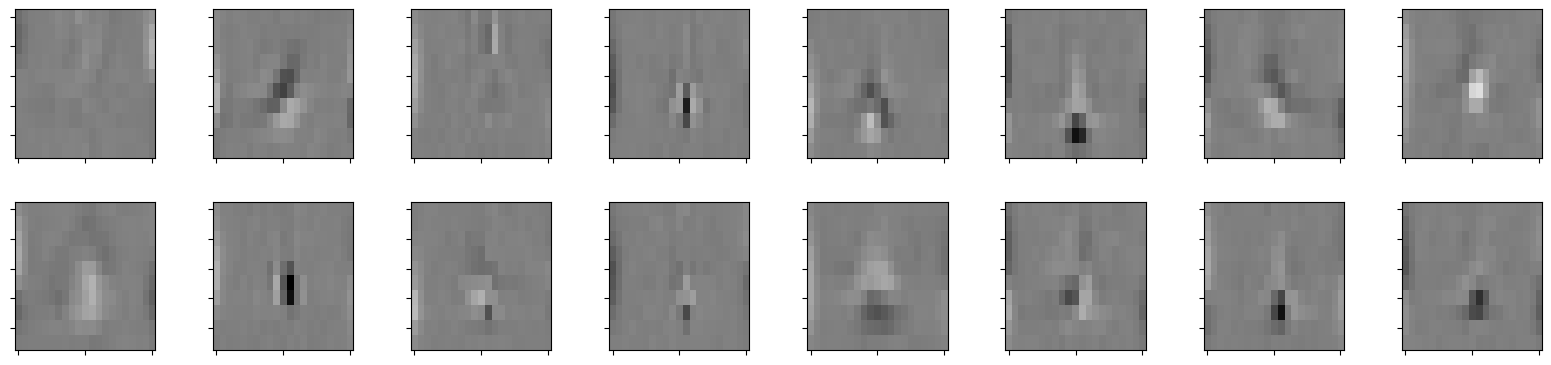

In [4]:
model.NDN.plot_filters()

(21, 10, 16) --> (16, 10, 21)
(16, 11, 8) --> (8, 11, 16)
(8, 5, 8) --> (8, 5, 8)


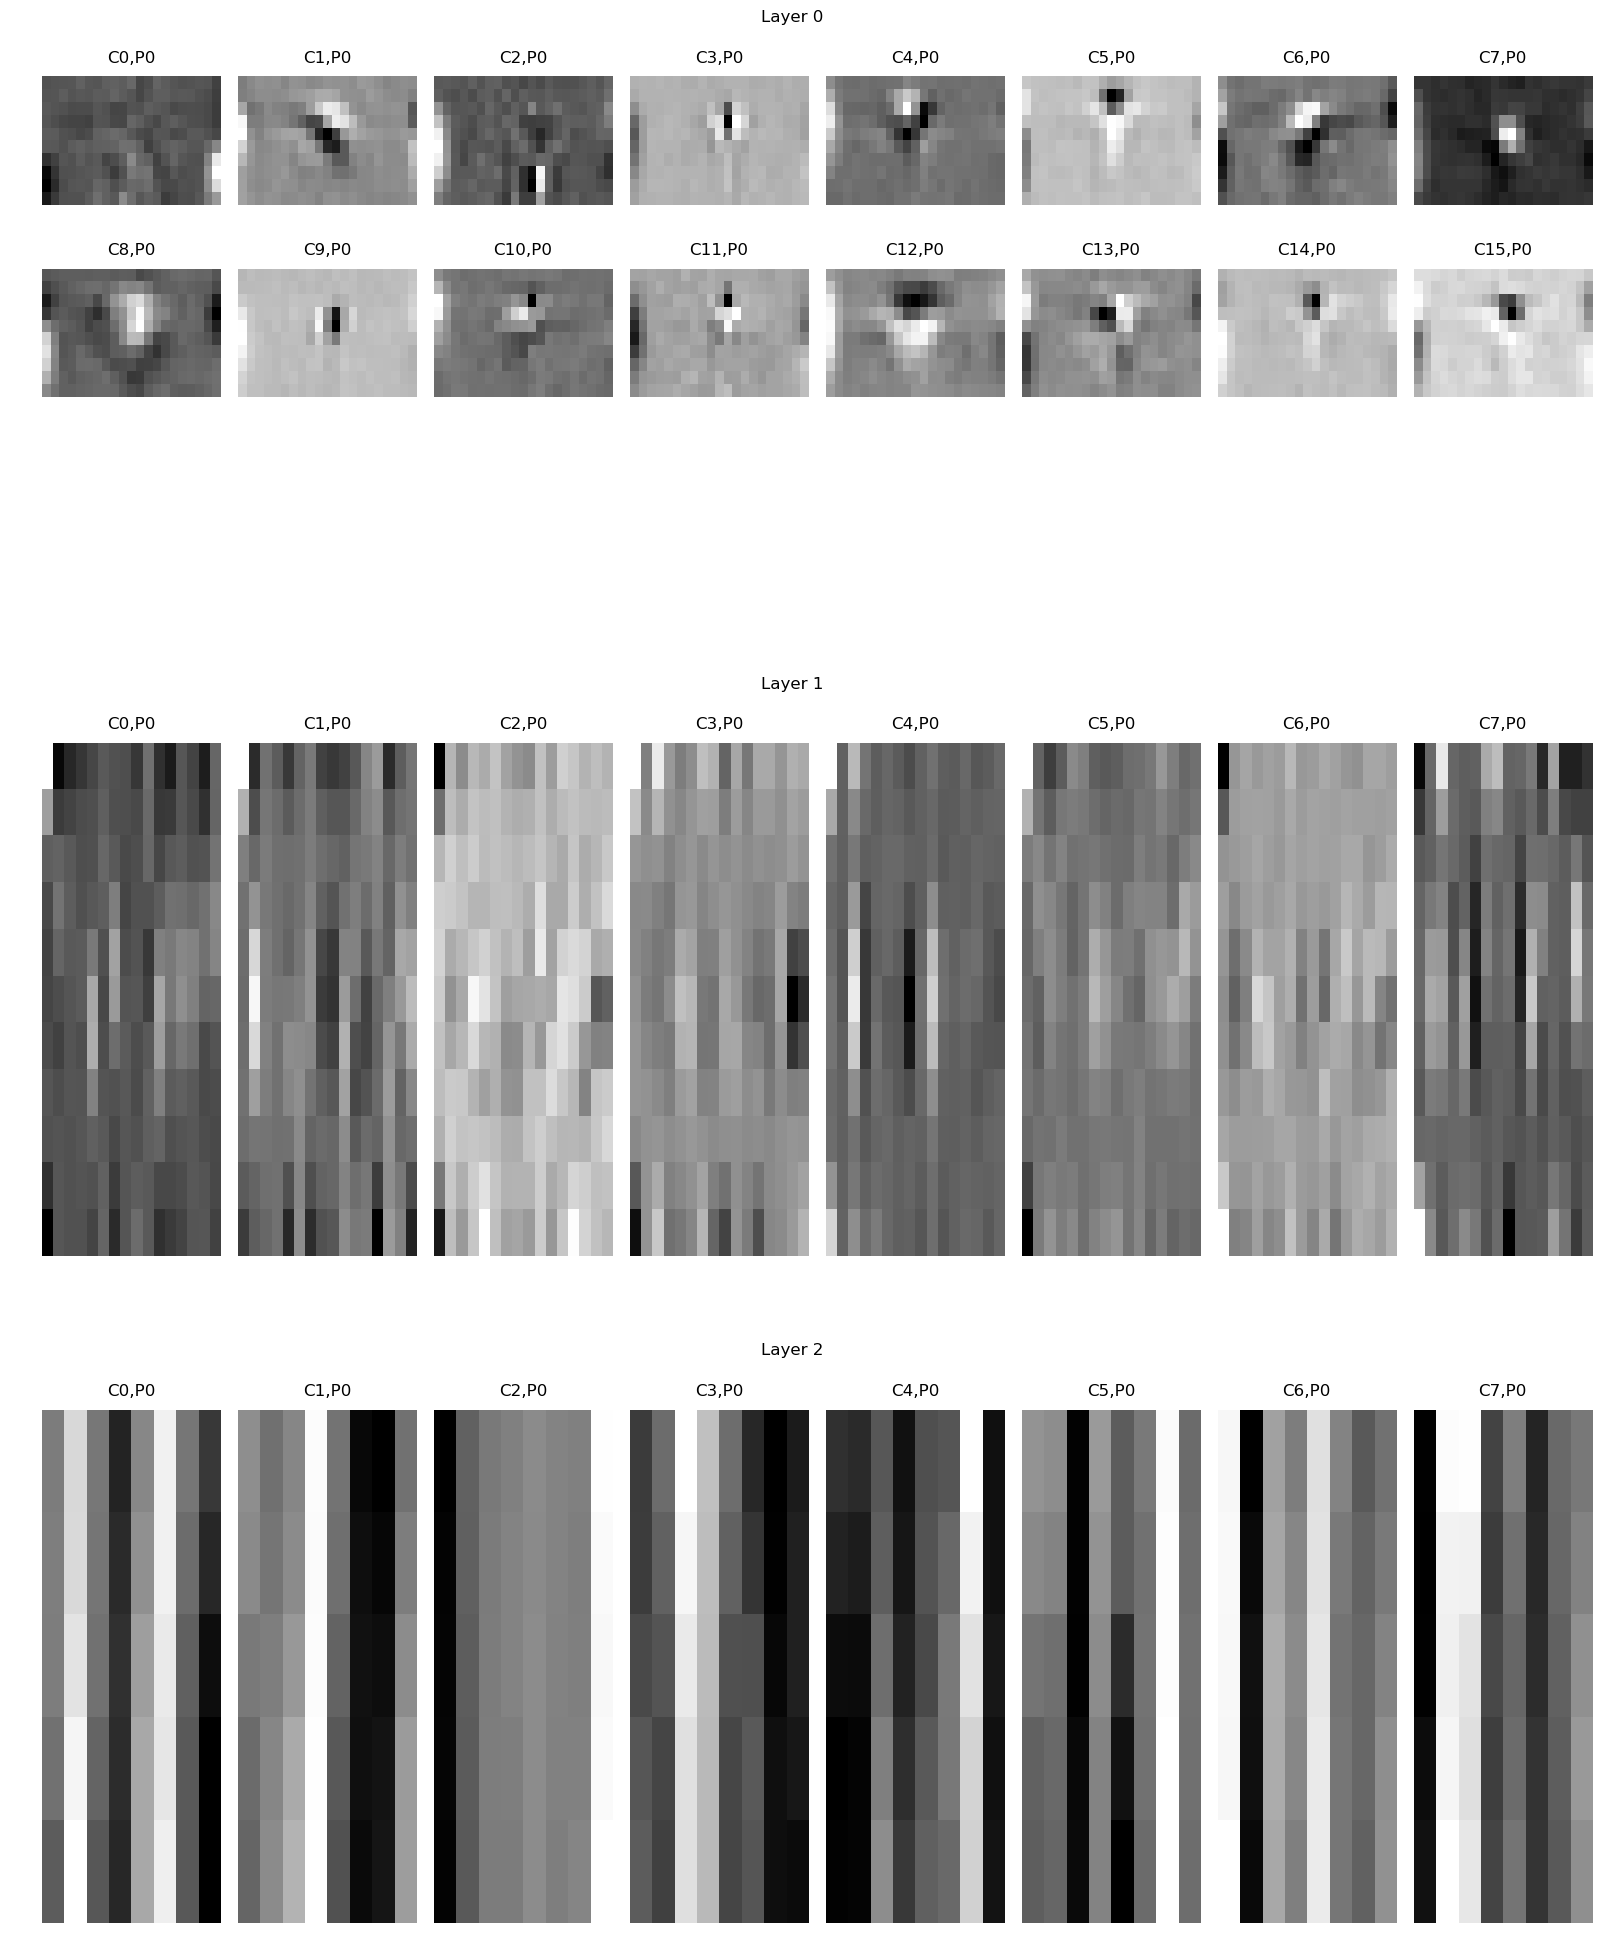

In [5]:
plot.plot_network_weights(model.networks[0], wspace=0.1, hspace=0.5, max_cols=8, figsize=(20,20))
# TODO: flip the plot and properly choose the imin and imax in my function
# TODO: add the plot function to the model object for convenience
# TODO: fix the plot_losses function on the results object